0.468718142927 0.129720832098 0.0864712282741 0.850406693379


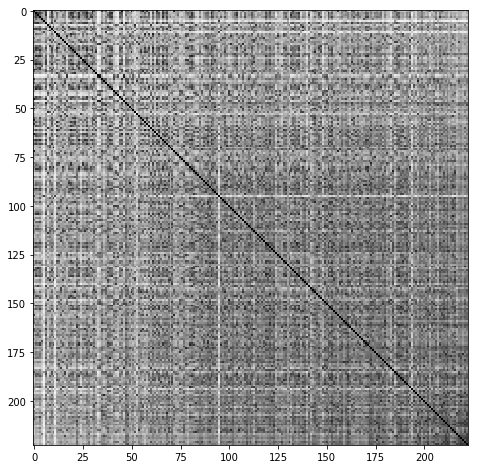

[ 0.05829596  0.11210762  0.04932735  0.10762332  0.00896861  0.01345291
  0.11659193  0.04484305  0.04484305  0.08071749  0.03587444  0.01793722
  0.06726457  0.05381166  0.04484305  0.06726457  0.04484305  0.04035874
  0.04932735  0.12107623  0.07623318  0.04484305  0.04484305  0.09865471
  0.02242152  0.04932735  0.04484305  0.16143498  0.0044843   0.04932735
  0.08071749  0.05829596  0.03587444  0.01793722  0.05829596  0.08071749
  0.03139013  0.03139013  0.08071749  0.09865471  0.06726457  0.06278027
  0.03587444  0.03587444  0.05829596  0.08520179  0.06726457  0.07174888
  0.04035874  0.04484305  0.05381166  0.02690583  0.03139013  0.02690583
  0.04932735  0.05829596  0.06278027  0.05381166  0.04484305  0.08071749
  0.06726457  0.17040359  0.04484305  0.11210762  0.12107623  0.04035874
  0.11210762  0.06278027  0.12556054  0.0941704   0.04484305  0.08071749
  0.05829596  0.03139013  0.03139013  0.04035874  0.04484305  0.05829596
  0.06726457  0.04035874  0.10762332  0.13901345  0

In [1]:
import pickle
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# dict_file='/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool4_K158_prune_512.pickle'
dict_file='/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_imagenet_car_vgg16_pool3_K223_norm_nowarp_prune_512.pickle'
with open(dict_file, 'rb') as fh:
    _, centers = pickle.load(fh)
    
centers = centers/np.sqrt(np.sum(centers**2, axis=1)).reshape(-1,1)
# dismat = cdist(centers, centers, 'cosine')
dismat = cdist(centers, centers, 'cosine')
msk = np.logical_not(np.eye(dismat.shape[0]).astype('bool'))
print(np.mean(dismat[msk]), np.std(dismat[msk]), np.min(dismat[msk]), np.max(dismat[msk]))
plt.imshow(dismat)
plt.show()

mthrh = 0.27
print(np.sum(dismat<mthrh, axis=1)/dismat.shape[0], np.mean(np.sum(dismat<mthrh, axis=1)/dismat.shape[0]))

0.481695764029 0.140788229053 1.45104041686e-05 0.847987527426


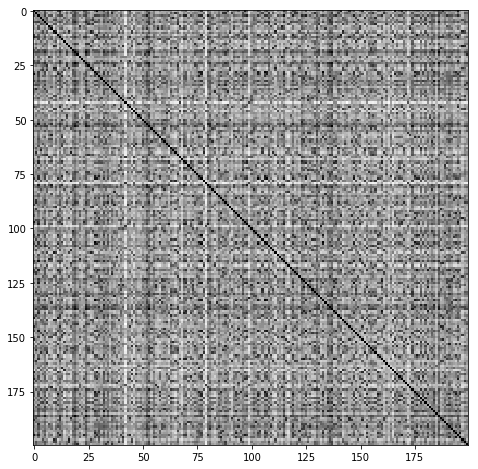

0.468587006541 0.999868473665 0.0591211927469
0.00404190472542 0.0232478527077 0.000129124385748
[ 0.085  0.105  0.2    0.055  0.03   0.155  0.075  0.03   0.065  0.05
  0.105  0.11   0.145  0.075  0.03   0.06   0.05   0.055  0.095  0.21   0.05
  0.035  0.005  0.045  0.2    0.09   0.05   0.055  0.155  0.135  0.095
  0.03   0.175  0.025  0.115  0.01   0.075  0.08   0.025  0.045  0.07   0.04
  0.02   0.015  0.045  0.065  0.04   0.04   0.03   0.015  0.055  0.02   0.17
  0.245  0.045  0.07   0.045  0.035  0.06   0.05   0.075  0.02   0.06
  0.085  0.03   0.055  0.085  0.055  0.01   0.135  0.125  0.02   0.045
  0.055  0.06   0.03   0.11   0.175  0.08   0.02   0.14   0.12   0.05   0.04
  0.025  0.055  0.07   0.05   0.12   0.04   0.035  0.035  0.06   0.085
  0.055  0.05   0.065  0.085  0.155  0.02   0.03   0.06   0.025  0.135
  0.02   0.055  0.16   0.14   0.085  0.055  0.05   0.05   0.045  0.02
  0.045  0.225  0.05   0.03   0.05   0.195  0.045  0.035  0.05   0.11
  0.115  0.125  0.035  0.06   0

In [3]:
dict_file='/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_car_VGG16_pool3_K200_vMFMM30.pickle'
with open(dict_file, 'rb') as fh:
    ass, centers, pi = pickle.load(fh)
    
dismat = cdist(centers, centers, 'cosine')
msk = np.logical_not(np.eye(dismat.shape[0]).astype('bool'))
print(np.mean(dismat[msk]), np.std(dismat[msk]), np.min(dismat[msk]), np.max(dismat[msk]))
plt.imshow(dismat)
plt.show()
print(np.mean(np.max(ass, axis=1)), np.max(np.max(ass, axis=1)), np.min(np.max(ass, axis=1)))
print(np.std(pi), np.max(pi), np.min(pi))

mthrh = 0.25
print(np.sum(dismat<mthrh, axis=1)/dismat.shape[0], np.mean(np.sum(dismat<mthrh, axis=1)/dismat.shape[0]))


0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 


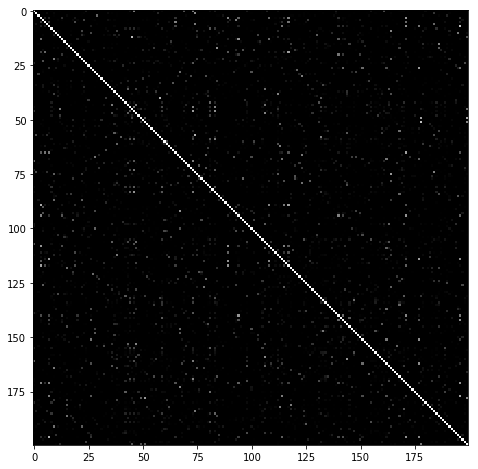

966


In [44]:
magic_thh = 0.39
vc_num = 200
file_path = '/export/home/qliu24/qing_voting_data/intermediate/feat_car/'
filename = file_path + 'car_mergelist_rand_train_car_pool4_vMFMM.pickle'
with open(filename, 'rb') as fh:
    _, layer_feature_dist = pickle.load(fh)
    
N = len(layer_feature_dist)
layer_feature_b = [None for nn in range(N)]
for nn in range(N):
    layer_feature_b[nn] = (layer_feature_dist[nn]<magic_thh).astype(int)
    
cofire_mat = np.zeros((vc_num, vc_num))
for nn in range(N):
    rownum,colnum = layer_feature_b[nn].shape[0:2]
    for rr in range(rownum):
        for cc in range(colnum):
            fire_vc = np.where(layer_feature_b[nn][rr,cc]==1)[0]
            for fvc in fire_vc:
                cofire_mat[fvc] += layer_feature_b[nn][rr,cc]
                
    if nn%50 == 0:
        print(nn, end=' ', flush=True)
        
print('')

fire_cnt = np.diagonal(cofire_mat)
cofire_rate = cofire_mat/fire_cnt.reshape(-1,1)
plt.imshow(cofire_rate)
plt.show()
np.fill_diagonal(cofire_rate, 0)
vcpair1, vcpair2 = np.where(cofire_rate>0.1)
print(len(vcpair1))


In [45]:
np.sort(-cofire_rate, axis=None)[0:20]

array([-0.76369914, -0.74698795, -0.7412231 , -0.71707317, -0.69731544,
       -0.67073684, -0.67004742, -0.65998855, -0.62884211, -0.62850601,
       -0.62778065, -0.62654615, -0.62386831, -0.62306664, -0.611763  ,
       -0.60939041, -0.59952653, -0.59822616, -0.59438017, -0.59245011])

In [34]:
vcpair1, vcpair2 = np.where(cofire_rate>0.1)
dis_ls = []
for pp in zip(vcpair1, vcpair2):
    dis_ls.append(dismat[pp[0],pp[1]])
    
print(np.sum(np.array(dis_ls)<magic_thh)/len(dis_ls))
    

0.941717791411


loading file 1/1
(100000, 512)
finish cos_dis
k++ center 0
k++ center 50
k++ center 100
k++ center 150
0.835432495825 0.0878253465746 0.290005741848 0.993669095407


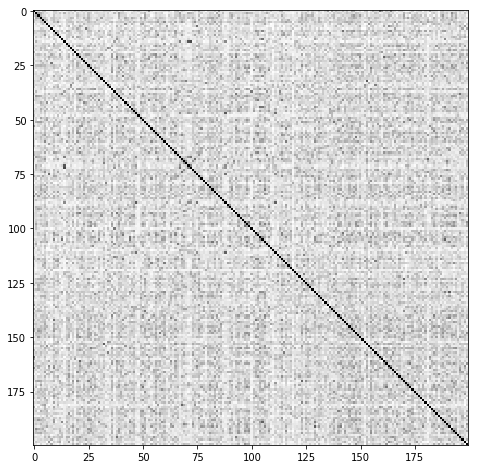

In [8]:
# test subsampling during k++
import numpy as np
from vMFMM import *
import pickle

cluster_num = 200
file_num = 1
featDim = 512

feat_set = np.zeros((featDim, 0))
for ii in range(file_num):
    print('loading file {0}/{1}'.format(ii+1, file_num))
    fname = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/pool4_all_dumped_data'+str(ii)+'.pickle'
    with open(fname, 'rb') as fh:
        res, _, _ = pickle.load(fh)
        feat_set = np.column_stack((feat_set, res))

feat_set = feat_set.T
print(feat_set.shape)
N = feat_set.shape[0]

features = feat_set/np.sqrt(np.sum(feat_set**2, axis=1)).reshape(-1,1)

centers = []
centers_i = []
cos_dis = 1-np.dot(features, features.T)
print('finish cos_dis')
centers_i.append(np.random.choice(N))
centers.append(features[centers_i[0]])
for i in range(cluster_num-1):
    if i%50==0:
        print('k++ center {0}'.format(i))

    subset_idx = np.random.choice(N, size=(100,), replace=False)
    
    prob = np.min(cos_dis[subset_idx,:][:,centers_i], axis=1)**2
    prob /= np.sum(prob)
    centers_i.append(np.random.choice(subset_idx, p=prob))
    centers.append(features[centers_i[-1]])
    
dismat = cdist(centers, centers, 'cosine')
msk = np.logical_not(np.eye(dismat.shape[0]).astype('bool'))
print(np.mean(dismat[msk]), np.std(dismat[msk]), np.min(dismat[msk]), np.max(dismat[msk]))
plt.imshow(dismat)
plt.show()

loading file 1/1
(100000, 512)
finish cos_dis
k++ center 0
k++ center 50
k++ center 100
k++ center 150
0.837453143805 0.0864845565382 0.267462346283 0.998740014878


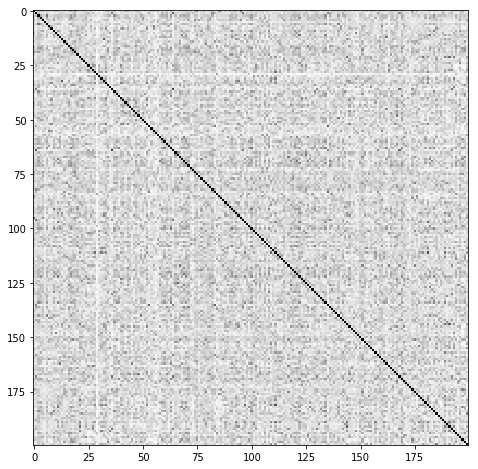

In [10]:
# test subsampling before k++
import numpy as np
from vMFMM import *
import pickle

cluster_num = 200
file_num = 1
featDim = 512

feat_set = np.zeros((featDim, 0))
for ii in range(file_num):
    print('loading file {0}/{1}'.format(ii+1, file_num))
    fname = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/pool4_all_dumped_data'+str(ii)+'.pickle'
    with open(fname, 'rb') as fh:
        res, _, _ = pickle.load(fh)
        feat_set = np.column_stack((feat_set, res))

feat_set = feat_set.T
print(feat_set.shape)
N = feat_set.shape[0]

features = feat_set/np.sqrt(np.sum(feat_set**2, axis=1)).reshape(-1,1)

centers = []
centers_i = []

rdn_index = np.random.choice(N, size=(10000,), replace=False)
cos_dis = 1-np.dot(features[rdn_index], features[rdn_index].T)

print('finish cos_dis')
centers_i.append(np.random.choice(rdn_index))
centers.append(features[centers_i[0]])
for i in range(cluster_num-1):
    if i%50==0:
        print('k++ center {0}'.format(i))

    subset_idx = np.random.choice(N, size=(100,), replace=False)
    
    cdisidx = [np.where(rdn_index==cci)[0][0] for cci in centers_i]
    prob = np.min(cos_dis[:,cdisidx], axis=1)**2
    prob /= np.sum(prob)
    centers_i.append(np.random.choice(rdn_index, p=prob))
    centers.append(features[centers_i[-1]])
    
dismat = cdist(centers, centers, 'cosine')
msk = np.logical_not(np.eye(dismat.shape[0]).astype('bool'))
print(np.mean(dismat[msk]), np.std(dismat[msk]), np.min(dismat[msk]), np.max(dismat[msk]))
plt.imshow(dismat)
plt.show()

In [13]:
# transfer VC centers from mat to pickle
import h5py
import numpy as np
import pickle

dic_file = '/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_imagenet_car_vgg16_pool4_K176_norm_nowarp_prune_512.mat'
f = h5py.File(dic_file)
centers3 = np.array(f['centers'].value)
print(centers3.shape)
aa = 0

sfile = dic_file.replace('.mat','.pickle')
with open(sfile,'wb') as fh:
    pickle.dump([aa, centers3], fh)

(176, 512)
